In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

In [ ]:
# Zakres
x_min = -np.pi
x_max = np.pi

# Ilość punktów
N = 100

#funkcja do interpolacji (sin(x))
def sinus_function(x):
    return np.sin(x)

#funkcja do interpolacji (sin(x^(-1)))
def sinus_function2(x):
    x[x == 0] = np.finfo(float).eps  #Zabezpieczenie przed dzieleniem przez zero
    return np.sin(1 / x)

#funkcja do interpolacji (sgn(sin(8x))
def sinus_function3(x):
  return np.sign(np.sin(8 * x))

In [ ]:
# przedział funkcji sinus
x = np.linspace(x_min, x_max, N)
y = sinus_function(x)

In [ ]:
# przedział funkcji sin(x^(-1))
x2 = np.linspace(x_min, x_max, N)
y2 = sinus_function2(x)

In [ ]:
#przedział dla funkcji sgn(sin(8x))
x3 = np.linspace(x_min, x_max, N)
y3 = sinus_function3(x)

In [ ]:
# Interpolacja funkcji sin(x)
def interp_func(new_N, _color, size):
  x_new = np.linspace(x_min, x_max, new_N)
  interp = interp1d(x, y, kind='linear')
  y_new = interp(x_new)
  plt.scatter(x_new, y_new, color=f'{_color}', s=size, label=f'{new_N} punktów')
  plt.plot(x,y)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Interpolacja funkcji sinus o {new_N} punktach')
  plt.grid(True)
  plt.show()

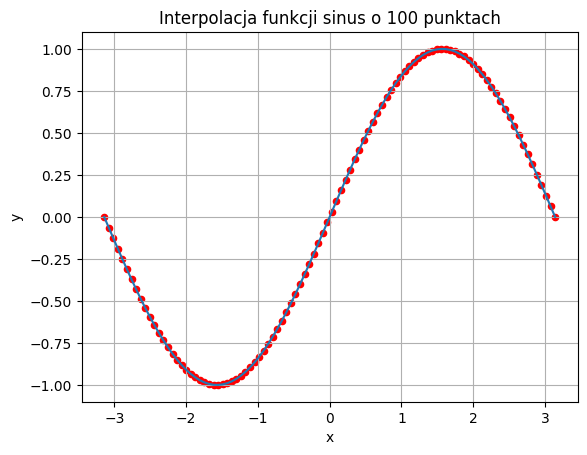

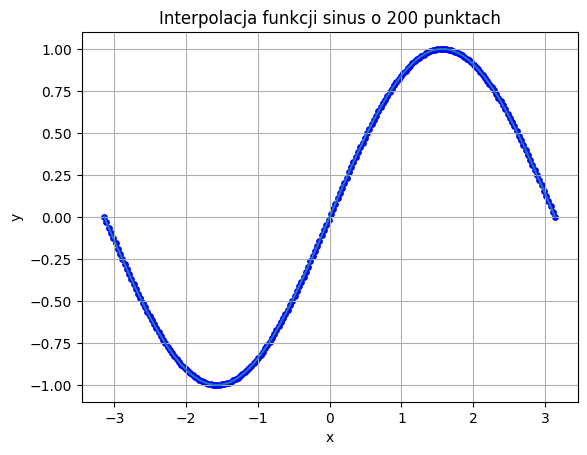

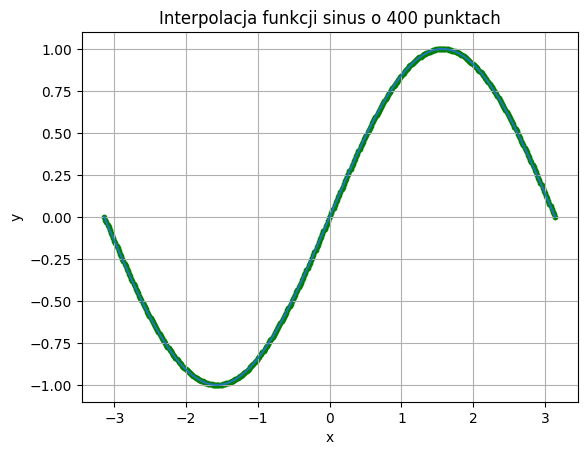

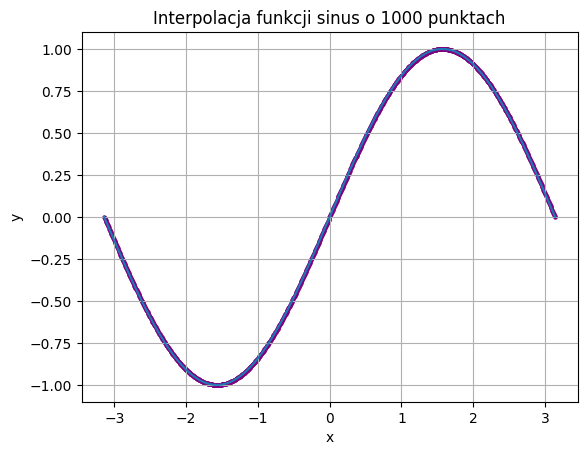

In [ ]:
interp_func(N, _color='red', size=20)
interp_func(N*2, _color='blue', size=15)
interp_func(N*4, _color='green', size=10)
interp_func(N*10, _color='purple', size=5)

In [ ]:
# Interpolacja funkcji sin(x^(-1))
def interp_func2(new_N, _color, size):
  x_new = np.linspace(x_min, x_max, new_N)
  interp = interp1d(x2, y2, kind='cubic')
  y_new = interp(x_new)
  plt.scatter(x_new, y_new, color=f'{_color}', s=size, label=f'{new_N} punktów')
  plt.plot(x2,y2)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Interpolacja funkcji o {new_N} punktach')
  plt.grid(True)
  plt.show()

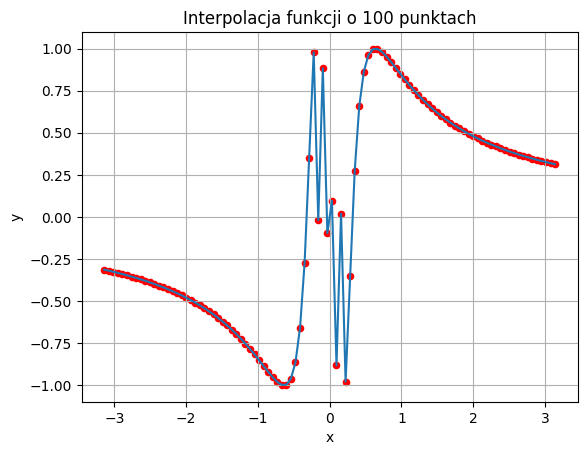

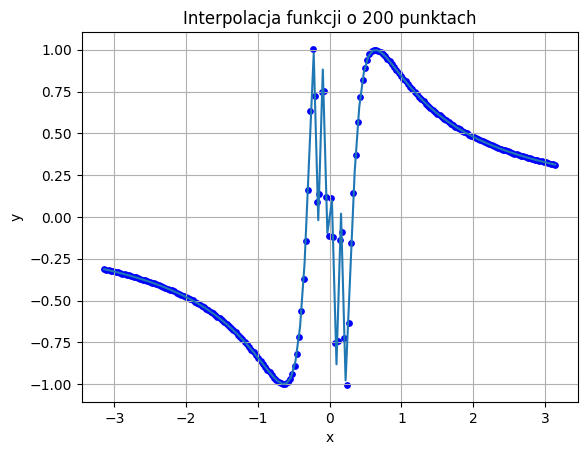

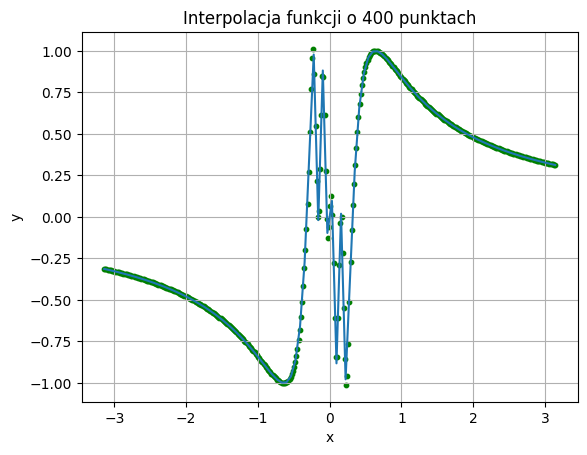

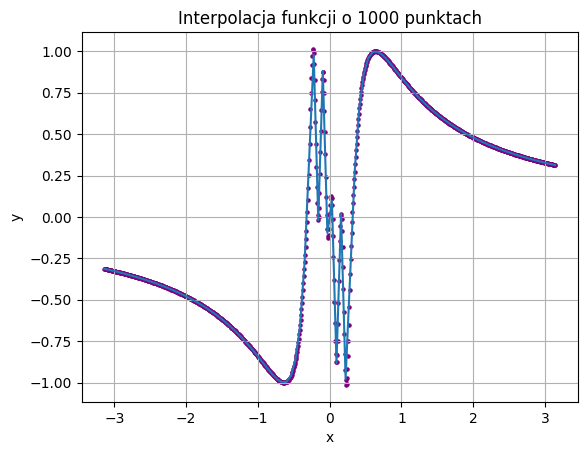

In [ ]:
interp_func2(N, _color='red', size=20)
interp_func2(N*2, _color='blue', size=15)
interp_func2(N*4, _color='green', size=10)
interp_func2(N*10, _color='purple', size=5)

In [ ]:
#interpolacja funkcji sgn(sin(8x))
def interp_func3(new_N, _color, size):
  x_new = np.linspace(x_min, x_max, new_N)
  interp = interp1d(x3, y3, kind='linear')
  y_new = interp(x_new)
  plt.scatter(x_new, y_new, color=f'{_color}', s=size, label=f'{new_N} punktów')
  plt.plot(x3,y3)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Interpolacja funkcji o {new_N} punktach')
  plt.grid(True)
  plt.show()

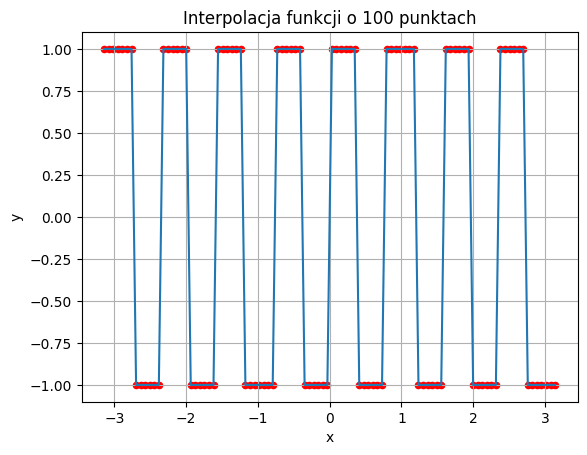

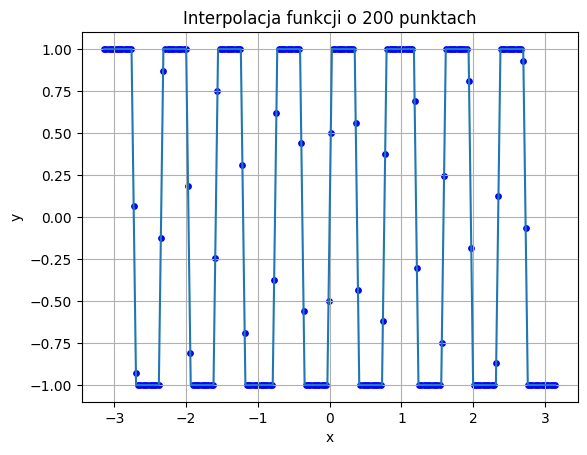

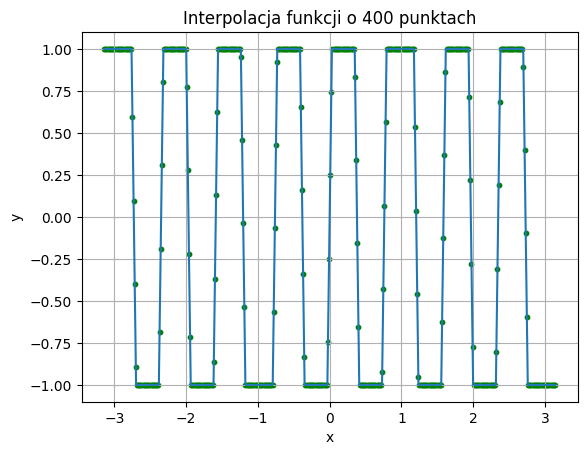

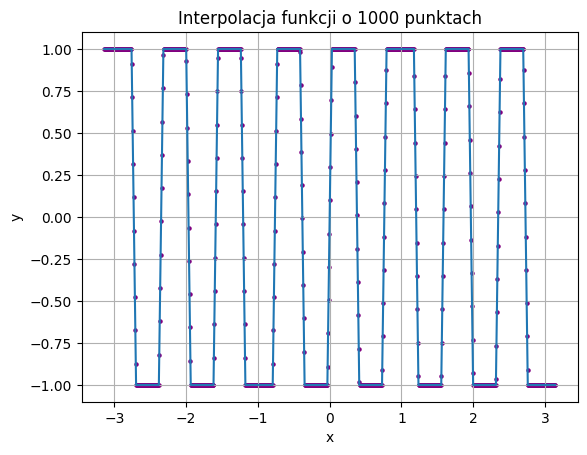

In [ ]:
interp_func3(N, _color='red', size=20)
interp_func3(N*2, _color='blue', size=15)
interp_func3(N*4, _color='green', size=10)
interp_func3(N*10, _color='purple', size=5)

In [ ]:
'''
Interpolacja przy użyciu
konwolucji
'''

# Funkcja jądro konwolucji h1(x)
def h1(x, width):
    return ((x >= 0) & (x < width))

# Funkcja jądro konwolucji h2(x)
def h2(x, width):
    return ((x >= -width/2) & (x < width/2))
# Funkcja jądro konwolucji h3(x)
def h3(x, width):
    return np.where((x >= -1) & (x < 1), np.where(x == 0, 1, np.sin(x) / x), 0) * width

# Funkcja do interpolacji za pomocą konwolucji
def interpolate_with_convolution(signal, kernel):
    return np.convolve(signal, kernel, mode='same')

# Przygotowanie danych
Nc = 100*10
'''Zamiennie na Nc*2, Nc*4, Nc*10 '''
x = np.linspace(-np.pi, np.pi, Nc)

signal = np.sign(np.sin(8*x))
'''
    Zamiennie na funkcje:
    np.sin(x)
    np.sin(1/x)
    np.sign(np.sin(8*x))
'''

# Ustalenie szerokości (width) na podstawie odległości między próbkami
width = np.mean(np.diff(x))
# Interpolacja za pomocą różnych jąder
interpolated_signal_h1 = interpolate_with_convolution(signal, h1(x, width))
interpolated_signal_h2 = interpolate_with_convolution(signal, h2(x, width))
interpolated_signal_h3 = interpolate_with_convolution(signal, h3(x, width))

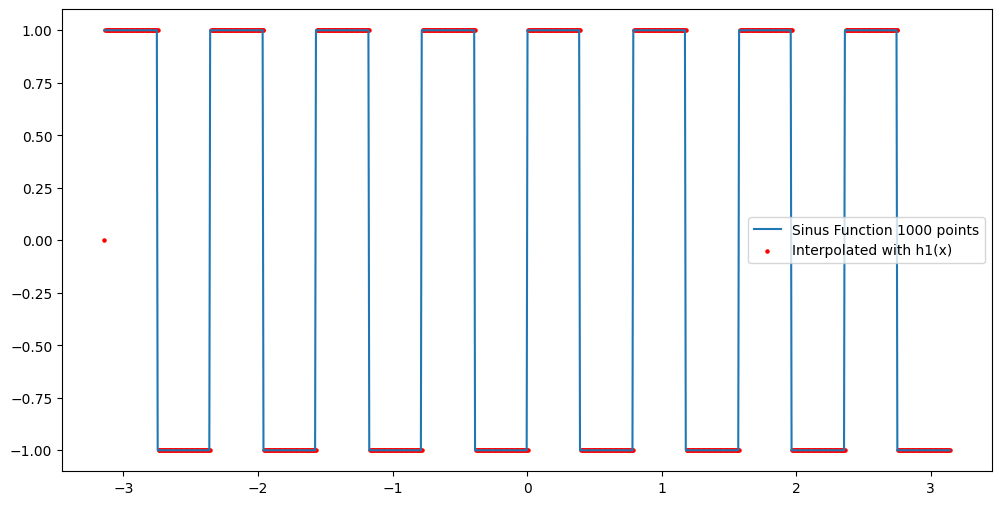

In [ ]:
interpolated_signal_h1 = interpolate_with_convolution(signal, h1(x, width))
plt.figure(figsize=(12, 6))
plt.plot(x, signal, label= f'Sinus Function {Nc} points')
plt.scatter(x, interpolated_signal_h1, color='red', s=5 , label='Interpolated with h1(x)')
plt.legend()

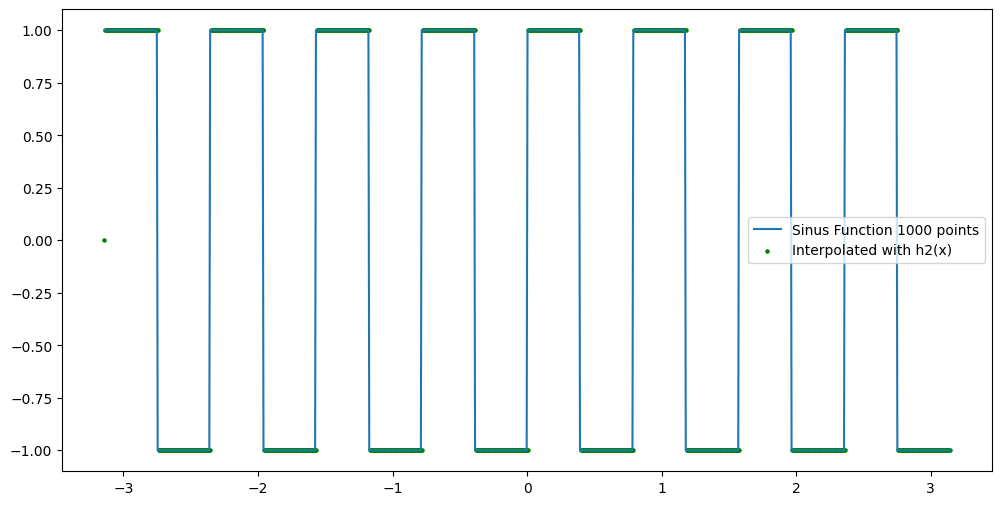

In [ ]:
interpolated_signal_h2 = interpolate_with_convolution(signal, h2(x, width))
plt.figure(figsize=(12, 6))
plt.plot(x, signal, label= f'Sinus Function {Nc} points')
plt.scatter(x, interpolated_signal_h2, color='green', s=5 , label='Interpolated with h2(x)')
plt.legend()

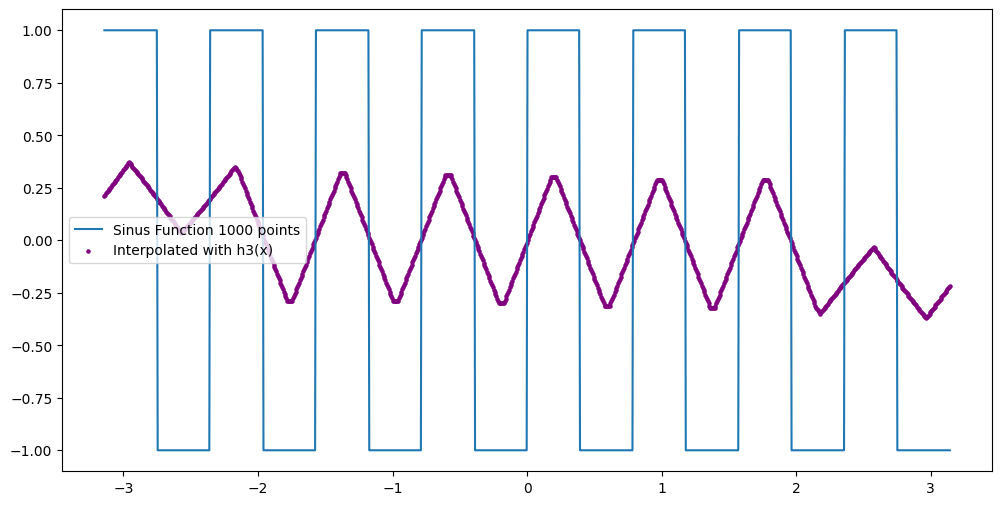

In [ ]:
interpolated_signal_h3 = interpolate_with_convolution(signal, h3(x, width))
plt.figure(figsize=(12, 6))
plt.plot(x, signal, label= f'Sinus Function {Nc} points')
plt.scatter(x, interpolated_signal_h3, color='purple', s=5 , label='Interpolated with h3(x)')
plt.legend()

In [ ]:
# Obliczanie MSE
mse_h1 = mean_squared_error(signal, interpolated_signal_h1)
mse_h2 = mean_squared_error(signal, interpolated_signal_h2)
mse_h3 = mean_squared_error(signal, interpolated_signal_h3)

print(f'MSE for h1(x): {mse_h1}')
print(f'MSE for h2(x): {mse_h2}')
print(f'MSE for h3(x): {mse_h3}')

MSE for h1(x): 0.061
MSE for h2(x): 0.061
MSE for h3(x): 0.7357736943167191
